In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils

import hes1_utils_general as general
import jochen_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os

import time

import warnings
warnings.filterwarnings("ignore")

# Simulation parameters

In [2]:
param_number = 2

In [169]:
if param_number==1:
    alpha_m=1
    alpha_p=1
    mu_m=0.03
    mu_p=0.03
    h=4.1
    P_0=10

    T=10000
    delta_t=0.01
    
    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[1,10,100,1000,5000,10000]
    val_tau=[18.7]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)

elif param_number==2:
    '''alpha_m=0.64
    alpha_p=17.32
    mu_m=np.log(2)/30
    mu_p=np.log(2)/90
    h=5.59
    P_0=88288.6

    T=10000
    delta_t=0.01

    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[0.001, 0.01, 0.1, 1]
    val_tau=[34]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)'''
    
    
    alpha_m=39.93
    alpha_p=21.56
    mu_m=np.log(2)/30
    mu_p=np.log(2)/90
    h=4.78
    P_0=24201.01

    T=10000
    delta_t=0.01

    n_t=int(T/delta_t)

    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[10**x for x in np.arange(-3,2.1,0.25)]
    val_tau=[33]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)
else:
    print('Parameters not supported.')

In [ ]:
ratio=(1+np.sqrt(5))/2

In [ ]:
font = {
    'family' : 'Arial',
    'color'  : 'black',
    'weight' : 'normal',
    'size'   : 22,
}

legendFont = 14

# Save directory

In [5]:
date_and_time=time.localtime()
string_date=str(date_and_time.tm_year)+'-'+str(date_and_time.tm_mon)+'-'+str(date_and_time.tm_mday)+'-'+str(date_and_time.tm_hour)+'-'+str(date_and_time.tm_min)+'-'+str(date_and_time.tm_sec)

write_directory = os.getcwd() + '\\paper plots ' + string_date
os.makedirs(write_directory)
os.makedirs(read_directory + '\\plots')

# Computation

In [8]:
n_iter_master = 2
n_iter_sde = 2

T = 100000
sampling_timestep = 1
n_t=int(T/sampling_timestep)

In [11]:
arr_mean_Mm=np.zeros((n_lambda,n_Omega))
arr_mean_Pm=np.zeros((n_lambda,n_Omega))

arr_mean_Ml=np.zeros((n_lambda,n_Omega))
arr_mean_Pl=np.zeros((n_lambda,n_Omega))

In [12]:
arr_std_Mm=np.zeros((n_lambda,n_Omega))
arr_std_Pm=np.zeros((n_lambda,n_Omega))

arr_std_Ml=np.zeros((n_lambda,n_Omega))
arr_std_Pl=np.zeros((n_lambda,n_Omega))

In [13]:
arr_momFour_Mm=np.zeros((n_lambda,n_Omega))
arr_momFour_Pm=np.zeros((n_lambda,n_Omega))

arr_momFour_Ml=np.zeros((n_lambda,n_Omega))
arr_momFour_Pl=np.zeros((n_lambda,n_Omega))

In [151]:
k=0

for i in range(n_lambda):
    for j in range(n_Omega):

        valueOfLambda = val_lambda[i]
        valueOfOmega = val_Omega[j]
        valueOfTau = val_tau[k]

        t0 = time.time()

        print("Value of lambda:", valueOfLambda)
        print("Value of Omega:", valueOfOmega)
        print("Value of tau:", valueOfTau)

        if valueOfLambda <= 0.1:
            n_iter_master = 2
            n_iter_sde = 2
        else:
            n_iter_master = 20
            n_iter_sde = 20

        output=general.simulate_master_meanAndStd(n_iter=n_iter_master, alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                    h=h,
                                                                    P_0=P_0,
                                                                    lambda_s=valueOfLambda,
                                                                    tau=valueOfTau,
                                                                    P_init=0,
                                                                    M_init=0,
                                                                    T=T,
                                                                    delta_t=delta_t,
                                                                    Omega=valueOfOmega,
                                                                    sampling_timestep = sampling_timestep)

        arr_mean_Mm[i,j]=output["mean Mm"]
        arr_mean_Pm[i,j]=output["mean Pm"]
        arr_std_Mm[i,j]=output["std Mm"]
        arr_std_Pm[i,j]=output["std Pm"]
        arr_momFour_Mm[i,j]=output["momentumFour Mm"]
        arr_momFour_Pm[i,j]=output["momentumFour Pm"]

        output=general.simulate_langevin_meanAndStd(n_iter=n_iter_sde,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                    h=h,
                                                                    P_0=P_0,
                                                                    lambda_s=valueOfLambda,
                                                                    tau=valueOfTau,
                                                                    P_init=0,
                                                                    M_init=0,
                                                                    T=T,
                                                                    delta_t=delta_t,
                                                                    Omega=valueOfOmega,
                                                                    sampling_timestep = sampling_timestep)            
        arr_mean_Ml[i,j]=output["mean Ml"]
        arr_mean_Pl[i,j]=output["mean Pl"]
        arr_std_Ml[i,j]=output["std Ml"]
        arr_std_Pl[i,j]=output["std Pl"]
        arr_momFour_Ml[i,j]=output["momentumFour Ml"]
        arr_momFour_Pl[i,j]=output["momentumFour Pl"]

        print("\n")
        print("Number of iterations: ", n_iter_master, n_iter_sde)
        print("Computation time: ", (time.time() - t0)//3600, "h ", ((time.time() - t0)//60)%60, "min ", (time.time() - t0)%60, "s")
        print("\n")


TypeError: 'fontdict' is an invalid keyword argument for print()

In [ ]:
try:
    os.makedirs(read_directory+'\\data1')
    os.makedirs(read_directory+'\\data2')
except FileExistsError:
    pass

In [ ]:
spec= [alpha_m, alpha_p, mu_m, mu_p, h, P_0, T, delta_t]

pd.DataFrame(spec,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\spec.csv')
pd.DataFrame(val_lambda,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\lambda.csv')
pd.DataFrame(val_Omega,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\Omega.csv')
pd.DataFrame(val_tau,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\tau.csv')

pd.DataFrame(arr_std_Mm,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Mm.csv')
pd.DataFrame(arr_std_Pm,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Pm.csv')
pd.DataFrame(arr_std_Ml,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Ml.csv')
pd.DataFrame(arr_std_Pl,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Pl.csv')
pd.DataFrame(arr_std_Mlna,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Mlna.csv')
pd.DataFrame(arr_std_Plna,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Plna.csv')

# Plots

In [ ]:
read_directory = 'paper plots 2023-12-10-15-25-10' #Name here the directory you want to use for the plots

In [ ]:
read_data=read_directory+'\\data'+str(param_number)

val_lambda=pd.read_csv(read_data + '\\lambda.csv')['value'].values
val_Omega=pd.read_csv(read_data + '\\Omega.csv')['value'].values
val_tau=pd.read_csv(read_data + '\\tau.csv')['value'].values

In [ ]:
arr_std_Mm=pd.read_csv(read_data + '\\std-Mm.csv')['value'].values
arr_std_Pm=pd.read_csv(read_data + '\\std-Pm.csv')['value'].values
arr_std_Ml=pd.read_csv(read_data + '\\std-Ml.csv')['value'].values
arr_std_Pl=pd.read_csv(read_data + '\\std-Pl.csv')['value'].values
arr_std_Mlna=pd.read_csv(read_data + '\\std-Mlna.csv')['value'].values
arr_std_Plna=pd.read_csv(read_data + '\\std-Plna.csv')['value'].values

In [84]:
arr_rel_Pl = abs(arr_std_Pm - arr_std_Pl)/arr_std_Pm

In [85]:
inv_val_lambda = [1/x for x in val_lambda]
inv_val_Omega  = [1/x for x in val_Omega]

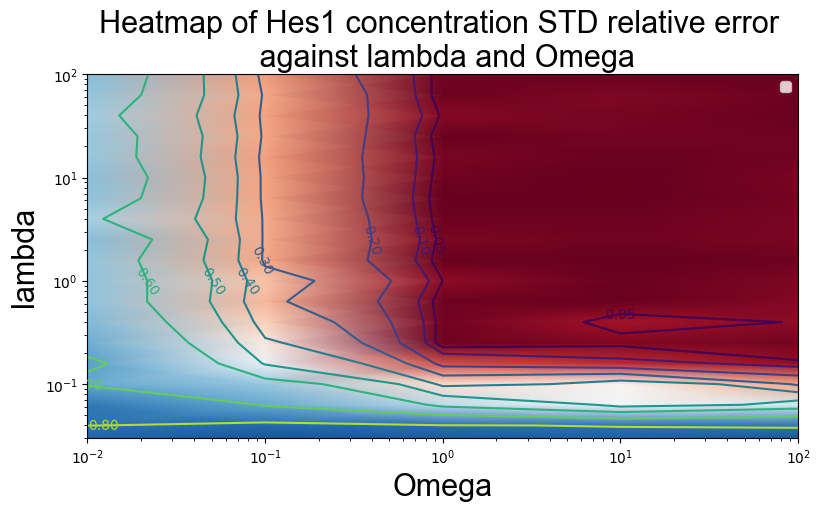

In [162]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Heatmap of Hes1 concentration STD relative error \n against lambda and Omega', fontdict = font) 
ax1.set_xlabel('Omega', fontdict = font) 
ax1.set_ylabel('lambda', fontdict = font)

cont=ax1.contour(val_Omega, val_lambda, arr_rel_Pl, levels = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], color = 'red')
hmap=ax1.pcolormesh(x, y, arr_rel_Pl, cmap='RdBu', shading = 'gouraud')
ax1.clabel(cont, inline=False, fontsize=10)
#ax1.fill_between(val_lambda[10:], 11*[0.25], 11*[100], color = 'red', alpha = 0.1)

#linelim, = ax1.plot(val_lambda, err_arr_varAll*30, '--', color = 'purple', alpha = 0.1)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*20, '--', color = 'purple', alpha = 0.2)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*10, '--', color = 'purple', alpha = 0.3)

ax1.legend([cont], ['Langevin model STD error'], loc='upper right')

#ax1.fill_between(val_lambda, err_arr_varAll*30, color = 'purple', alpha = 0.1)
#ax1.fill_between(val_lambda, err_arr_varAll*20, color = 'purple', alpha = 0.2)
#ax1.fill_between(val_lambda, err_arr_varAll*10, color = 'purple', alpha = 0.3)

ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')        

ax1.set_xlim(0.01, 100)
ax1.set_ylim(0.03, 100)

plt.savefig(read_directory +'\\plots\\heatmap-error-plot- tau' + str(val_tau[k]) + '.pdf')  
plt.show()

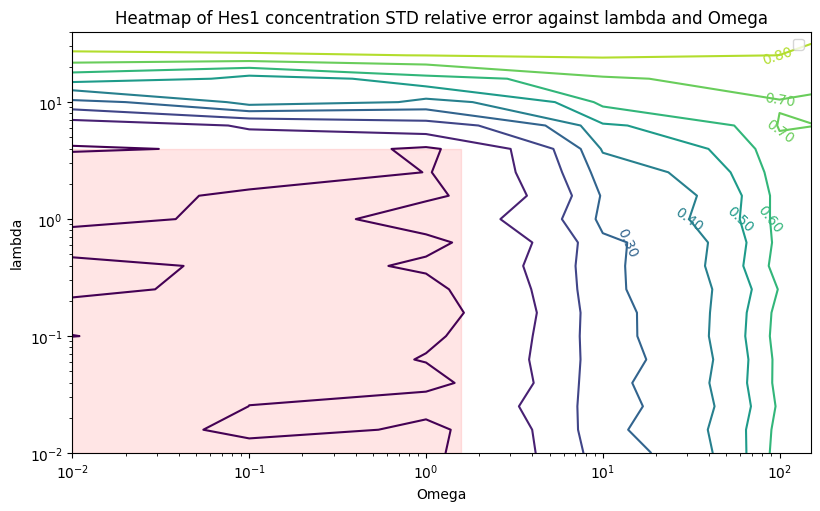

In [100]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Heatmap of Hes1 concentration STD relative error against lambda and Omega') 
ax1.set_xlabel('Omega') 
ax1.set_ylabel('lambda')

cont=ax1.contour(inv_val_Omega, inv_val_lambda, arr_rel_Pl, levels = [0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], color = 'red')
ax1.clabel(cont, inline=False, fontsize=10)
ax1.fill_between(val_lambda[:12], 12*[0.01], 12*[4], color = 'red', alpha = 0.1)

ax1.legend([cont], ['Langevin model STD error'], loc='upper right')

ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')        

ax1.set_xlim(0.01, 150)
ax1.set_ylim(0.01, 40)

plt.savefig(read_directory +'\\plots\\heatmap-error-plot- tau' + str(val_tau[k]) + '.pdf')  
plt.show()

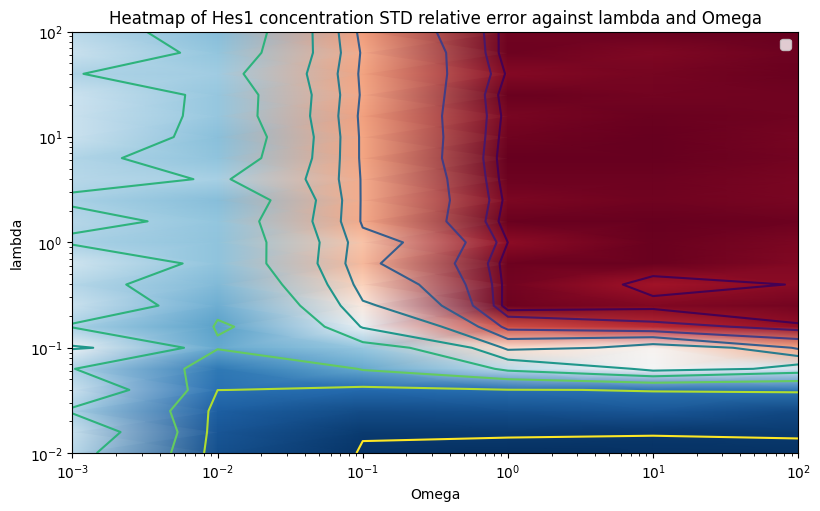

In [147]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Heatmap of Hes1 concentration STD relative error against lambda and Omega') 
ax1.set_xlabel('Omega') 
ax1.set_ylabel('lambda')

x, y = np.meshgrid(val_Omega, val_lambda)
cont=ax1.pcolormesh(x, y, arr_rel_Pl, cmap='RdBu', shading = 'gouraud')
#ax1.fill_between(val_lambda[10:], 11*[0.25], 11*[100], color = 'red', alpha = 0.1)

#linelim, = ax1.plot(val_lambda, err_arr_varAll*30, '--', color = 'purple', alpha = 0.1)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*20, '--', color = 'purple', alpha = 0.2)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*10, '--', color = 'purple', alpha = 0.3)

ax1.legend([cont], ['Langevin model STD error'], loc='upper right')

#ax1.fill_between(val_lambda, err_arr_varAll*30, color = 'purple', alpha = 0.1)
#ax1.fill_between(val_lambda, err_arr_varAll*20, color = 'purple', alpha = 0.2)
#ax1.fill_between(val_lambda, err_arr_varAll*10, color = 'purple', alpha = 0.3)

ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')        


ax1.set_xlim(0.001, 100)
ax1.set_ylim(0.01, 100)

#plt.savefig(read_directory +'\\plots\\heatmap-error-plot- tau' + str(val_tau[k]) + '.pdf')  
plt.show()